# HW 3: 
### In this HW you will be exploring the MNIST dataset and clustering techniques to understand the motivations behind clustering as well as digging deeper into Kmeans and Nearest Neighbor clustering.


#### We are going to classify the famous MNIST dataset. Specifically, we will look at 4, 9 and see if we can see our knowledge
of the problem and intuition to build a classifier.

To open notebook in Colab please click below:
<a href="https://colab.research.google.com/github/bwolfson2/dsclass2022/blob/main/Homeworks/HW_3.ipynb" target="_parent"> <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" /> </a>'

### The following lines are just to download MNIST

In [ ]:
#hide
!pip install -Uqq fastbook
import fastbook

### imports

In [1]:
#hide
from fastai.vision.all import *
from fastbook import *
import pandas as pd
import numpy as np

matplotlib.rc('image', cmap='Greys')

/home/wolfs/anaconda3/lib/python3.8/site-packages/fastbook/__init__.py:19: UserWarning: Missing `graphviz` - please run `conda install fastbook`
  except ModuleNotFoundError: warn("Missing `graphviz` - please run `conda install fastbook`")


In [2]:
#load mnist
path = untar_data(URLs.MNIST)
#hide
Path.BASE_PATH = path
nines = (path/'training'/'9').ls().sorted() + (path/'testing'/'9').ls().sorted() 
fours = (path/'training'/'4').ls().sorted() + (path/'testing'/'4').ls().sorted()

In [3]:
### arrange into elements and pull arrays
nines_a = [array(Image.open(i)) for i in nines]
fours_a = [array(Image.open(i)) for i in fours]

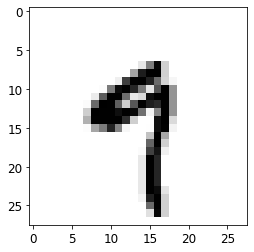

In [4]:
#display a nine
plt.imshow(nines_a[0])


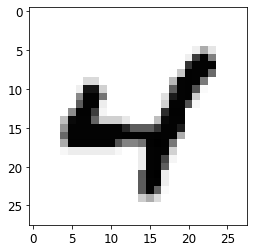

In [5]:
#display a four
plt.imshow(fours_a[0])

In [6]:
#alterante way to display a nine
im9 = nines_a[10]
df = pd.DataFrame(im9[4:30,4:30])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,56,101,120,255,254,254,254,254,254,255,217,37,0,0,0,0,0,0,0,0
4,0,0,17,70,229,253,253,253,253,253,253,253,253,253,253,120,0,0,0,0,0,0,0,0
5,0,0,182,253,253,253,253,253,253,253,253,253,253,253,253,245,0,0,0,0,0,0,0,0
6,17,182,253,253,253,253,234,99,211,160,160,186,253,253,253,245,0,0,0,0,0,0,0,0
7,47,253,253,253,253,253,253,253,235,179,39,98,253,253,253,222,0,0,0,0,0,0,0,0
8,21,194,253,253,253,253,253,253,253,253,253,253,253,253,253,92,0,0,0,0,0,0,0,0
9,0,9,195,253,253,253,253,253,253,253,253,253,253,253,253,239,49,0,0,0,0,0,0,0


### Now we flatten the images to be 28*28 = 784 size vectors

In [7]:
#we flatten the arrays
nines_ra = np.array(nines_a).reshape(-1,28*28)
fours_ra = np.array(fours_a).reshape(-1,28*28)
nines_tag = np.zeros(len(nines_ra))
fours_tag = np.ones(len(fours_ra))

In [8]:
nines_ra.shape,nines_tag.shape,fours_ra.shape,fours_tag.shape

((6958, 784), (6958,), (6824, 784), (6824,))

### Q1: What would serve as good cluster centers if you wanted to predict if something is a 4 or a 9? Note you do not need any models here.

In [9]:
from sklearn.model_selection import train_test_split    

all_X = np.concatenate([nines_ra,fours_ra],axis = 0)
all_Y = np.concatenate([nines_tag,fours_tag],axis = 0)

all_X.shape,all_Y.shape
X_train, X_test, Y_train, Y_test = train_test_split(all_X, all_Y, test_size=0.33, random_state=42)

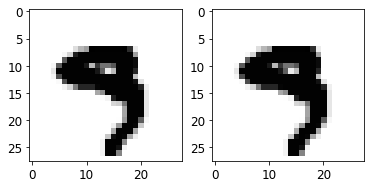

In [10]:
# Your code here
#if you want to see a nine or any other array you can use:
f, axarr = plt.subplots(1,2)
axarr[0].imshow(im9.reshape(28,28))
axarr[1].imshow(im9.reshape(28,28))

### Q2: Use the cluster centers above to build a simple classifier for nines and fours. Test your classifier and report accuracy 

In [ ]:
# Your code here


### Q3: Where does the classifier make mistakes. Why? Show one such mistake


In [ ]:
# Your code here

### Q4: Now build a KMeans classifier and KNeighborsClassifier classifier with n=5, report your results -- are they better or worse than the clusters you designed? Why or why not?

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

KNeighborsClassifier()

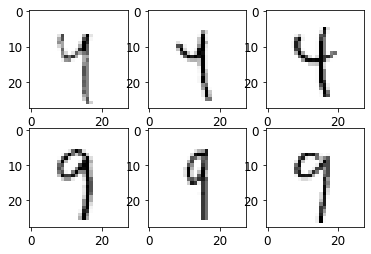

In [19]:
## Plot at least 2 mistakes

### Q5. Now go ahead and fit k = 1,5,10,100 neighbors to the dataset and plot the ROC curves

In [161]:
ks = [1,5,10,100]


### Q6. The ROC curves are hard to make out. Go ahead and report the AUC and report which model does better? What does AUC miss? (Consider costs)